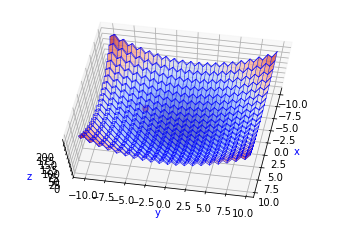

In [62]:
import numpy as np

teta=3
def f(x):
    return 20. + x[0]**2+x[1]**2-10.*(np.cos(2.*np.pi*x[0])+np.cos(2.*np.pi*x[1]))
#    return (x[0]**2+x[1]-11)**2 + (x[1]**2+x[0]-6)**2
#    return(x[0]*x[0]+2*x[1]*x[1]+np.exp(x[0]*x[0]+x[1]*x[1])-x[0]+2*x[1])
def f1(x, y):
    return 20. + x**2+y**2-10.*(np.cos(2.*np.pi*x)+np.cos(2.*np.pi*y))
#    return (x**2+y-11)**2 + (y**2+x-6)**2
#    return(x*x+2*y*y+np.exp(x*x+y*y)-x+2*y)

def get_grad(x):
    return np.array([2.*(x[0]+10.*np.pi*np.sin(2.*np.pi*x[0])) ,2.*(x[1]+10.*np.pi*np.sin(2.*np.pi*x[1])) ],float)
#    return np.array([2*(2*x[0]*(x[0]**2+x[1]-11)+x[0]+x[1]**2-6),2*(2*x[1]*(x[0]+x[1]**2-6)+x[0]**2+x[1]-11)], float)
#    return np.array([2*x[0]+2*x[0]*np.exp(x[0]*x[0]+x[1]*x[1])-1,4*x[1]+2*x[1]*np.exp(x[0]*x[0]+x[1]*x[1])+2],float)   

x = np.array([[-3],[-5]], dtype=np.float64)
k=0
a=0
grad_f=get_grad(x)
g=-grad_f
h=-grad_f

#draw
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 

x1 = np.arange(-10.,10.,0.5)
y1 = np.arange(-10.,10.,0.5)
x2, y2 = np.meshgrid(x1, y1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x2, y2, f1(x2, y2), cmap=cm.coolwarm,rstride=1, cstride=1, linewidth=0.5, antialiased=True, color='blue',alpha=0.8)
ax.plot_wireframe(x2, y2, f1(x2, y2), linewidth=0.5, antialiased=True, color='blue')
ax.set_xlabel('x', color='blue')
ax.set_ylabel('y', color='blue')
ax.set_zlabel('z', color='blue')

plt.plot(x[0], x[1], f(x), 'ro')
ax.view_init(70, 10)
plt.draw()
plt.pause(0.5)
#draw



start dot is:  [-3. -5.]
new beta is:  [[-1.51849466e-12]]
new x is:  [[-2.30926389e-14]
 [-3.81916720e-14]]
new h is:  [[ 6.]
 [10.]]
new g is:  [[9.16279370e-12]
 [1.51538511e-11]]
new rho is:  0.5


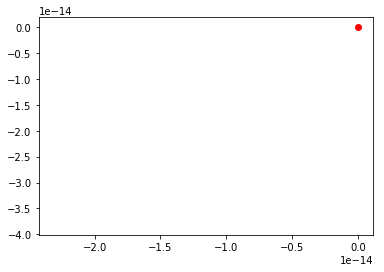

x =  [-2.30926389e-14 -3.81916720e-14]
f(x) =  [0.]


In [63]:
        print("start dot is: ", x.flatten())
        stop = 0
        while (stop != 1):
            rho = 1
            min = 100
            for a in np.arange(0.,1.,0.01):
                s=f(x+a*h)
                if s<min:
                    min=s
                    rho=a
            x=x+rho*h
            g_old=g
            g=-get_grad(x)
            if np.linalg.norm(g) < 0.1:
                stop = 1
            beta=np.dot(np.transpose(g-g_old),g)/np.dot(np.transpose(g_old),g_old)
            print("new beta is: ",beta)
            print("new x is: ",x)
            print("new h is: ",h)
            print("new g is: ",g)
            print("new rho is: ",rho)
            if k%(teta-1)==0:
                beta=0
            h=g+beta*h
            k=k+1
            #draw
            plt.plot(x[0], x[1], f(x), 'ro')
            plt.draw()
            plt.pause(0.2)
            #draw
        print("x = ", x.flatten())
        print("f(x) = ", min)

        x = np.array([[a1],[a2]], dtype=np.float64)
        k=0
        a=0
        grad_f=get_grad(x)
        g=-grad_f
        h=-grad_f


In [30]:
x.shape

(2, 1)

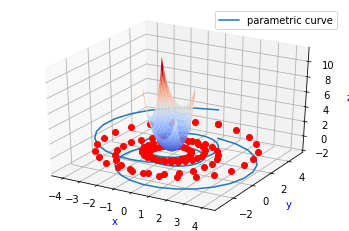

In [4]:
from matplotlib import cm
x1 = np.arange(-1.,1.,0.1)
y1 = np.arange(-1.,1.,0.1)
x, y = np.meshgrid(x1, y1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3 planes
ax.plot_surface(x, y, f1(x, y), cmap=cm.coolwarm,rstride=1, cstride=1, linewidth=0, antialiased=True, color='blue')
ax.set_xlabel('x', color='blue')
ax.set_ylabel('y', color='blue')
ax.set_zlabel('z', color='blue')


ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.plot(x, y, 'ro')

plt.show()